This file will make Figure 1 and 2 in the paper using the state variable data from data_statevariables.txt and the biomass prediction code biomass.py

In [1]:
import numpy as np
import pandas as pd
import biomass as bm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data
data = pd.read_csv('data_statevariables.txt')

In [3]:
# Now add a column for predicted numerical biomass data
data['pBnum'] = np.zeros(len(data))
# Iterate through each row and append the biomass information
for index, row in data.iterrows():
    data.loc[index,'pBnum'] = bm.biomass(row)

In [4]:
# This row is temporary, but add list of what type of site. 
# The idea is this will be included in the future file erica sends me
data['site_type'] = ['Tropical forest', 
                     'Tropical forest', 
                     'Tropical forest', 
                     'Tropical forest', 
                     'Temperate forest',
                     'Temperate forest',
                     'Temperate forest',
                     'Subalpine meadow', 
                     'Hawaiian arthropods', 
                     'Hawaiian arthropods', 
                     'Hawaiian arthropods', 
                     'Hawaiian arthropods', 
                     'Hawaiian arthropods', 
                     'Temperate invertebrates']

In [5]:
display(data)

,site,S,N,E,B,pBnum,site_type
0,bci,305,229000,19750000,266500000,3.585610e+08,Tropical forest
1,cocoli,154,6823,1269000,21920000,1.631427e+07,Tropical forest
2,sherman,200,8249,943400,10760000,1.013601e+07,Tropical forest
3,pasoh,802,321539,20452000,220647000,2.898457e+08,Tropical forest
4,ucsc,31,8376,9001000,193300000,3.043935e+08,Temperate forest
5,vision,27,1844,3004000,107490000,8.718301e+07,Temperate forest
6,bayview,16,486,406800,7642000,8.007665e+06,Temperate forest
7,subalpine,31,877,917900,17530000,1.928997e+07,Subalpine meadow
8,volcano,167,1909,88120,424300,5.433881e+05,Hawaiian arthropods
9,lanai,123,2253,41210,165800,1.979027e+05,Hawaiian arthropods


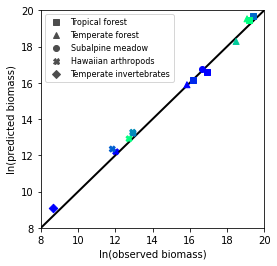

In [13]:
# Figure 1
fig,ax = plt.subplots(figsize=(4,4))

# Plot data
ydata = np.log(data['pBnum'])
xdata = np.log(data['B'])
# Loop through each site type to put a different marker
# First get list of site types
stype = data['site_type'].unique()
# Make marker list. Has to be same length as stype
mlist = ['s','^','o','X','D']
# Set up color scheme
smax = np.max(data['S'])
cm = 'winter'
for m,s in zip(mlist,stype):
    inds = data['site_type']==s
    ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['S'][inds])/np.log(smax),cmap=cm)

# Get colormap - Scale here is hard. I don't think it's super useful either.
#fig.colorbar(pcm)

# Set range
ymin = np.floor(np.min(ydata))
ymax = np.ceil(np.max(ydata))
xmin = np.floor(np.min(xdata))
xmax = np.ceil(np.max(xdata))
# Set range min as min of those
rmin = np.min([ymin,xmin])
rmax = np.max([ymax,xmax])
ax.set_ylim(rmin,rmax)
ax.set_xlim(rmin,rmax)

# Plot 1:1 line at the back
xrange = np.linspace(rmin,rmax)
ax.plot(xrange,xrange,lw=2,c='k',zorder=0)#,label='1:1 line') # Can add this back in

# Labels
ax.set_ylabel('ln(predicted biomass)')
ax.set_xlabel('ln(observed biomass)')

# Legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for m,s in zip(mlist,stype):
    leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")
ax.legend([leg[s] for s in stype],stype,prop={"size":8})

# Save
fig.savefig('figures/fig1.pdf')

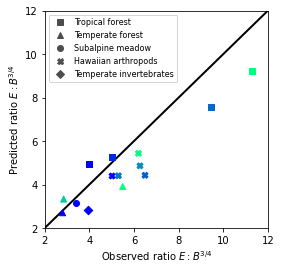

In [19]:
# Figure 1
fig,ax = plt.subplots(figsize=(4,4))

# Plot data
ydata = data['E']/data['pBnum']**(3/4)
xdata = data['E']/data['B']**(3/4)
# Loop through each site type to put a different marker
# First get list of site types
stype = data['site_type'].unique()
# Make marker list. Has to be same length as stype
mlist = ['s','^','o','X','D']
# Set up color scheme
smax = np.max(data['S'])
cm = 'winter'
for m,s in zip(mlist,stype):
    inds = data['site_type']==s
    ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['S'][inds])/np.log(smax),cmap=cm)

# Set range
ymin = np.floor(np.min(ydata))
ymax = np.ceil(np.max(ydata))
xmin = np.floor(np.min(xdata))
xmax = np.ceil(np.max(xdata))
# Set range min as min of those
rmin = np.min([ymin,xmin])
rmax = np.max([ymax,xmax])
ax.set_ylim(rmin,rmax)
ax.set_xlim(rmin,rmax)

# Plot 1:1 line at the back
xrange = np.linspace(rmin,rmax)
ax.plot(xrange,xrange,lw=2,c='k',zorder=0)#,label='1:1 line') # Can add this back in

# Labels
ax.set_ylabel(r'Predicted ratio $E:B^{3/4}$')
ax.set_xlabel(r'Observed ratio $E:B^{3/4}$')

# Legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for m,s in zip(mlist,stype):
    leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")
ax.legend([leg[s] for s in stype],stype,prop={"size":8})

# Save
fig.savefig('figures/fig2.pdf')